In [489]:
#!pip install catboost

In [532]:
# Importing All what we need

import  os
import  re
import  copy
import  xgboost
import  lightgbm                  as lgb
import  numpy                     as np
import  pandas                    as pd
import  matplotlib.pyplot         as plt
import  seaborn                   as sns
import  plotly.offline            as pyo
import  plotly.graph_objs         as go

from    sklearn.linear_model      import LinearRegression
from    sklearn.model_selection   import train_test_split
from    sklearn.metrics           import accuracy_score
from    sklearn.metrics           import mean_absolute_error, mean_squared_error, r2_score
from    math                      import fabs
from    catboost                  import CatBoostRegressor

In [491]:
pd.set_option('display.max_columns', None)

In [492]:
def PrintAllUniqValue(dataFrame):
  tmpDict = dict()

  for i in range(len(dataFrame.columns)):
    tmpDict[dataFrame.columns[i]] = dataFrame[dataFrame.columns[i]].unique()
    print(i, '. ', dataFrame.columns[i], ': ', tmpDict[dataFrame.columns[i]])
  #print(tmpDict)

# **Берём данные**


---




In [493]:
# Getting path to the file with data

PATH      = os.getcwd()
data_path = PATH + '/drive/My Drive/ColabData'
# filePath  = data_path+"/"+os.listdir(data_path)[0]
filePath  = data_path+"/" + 'data.csv'

print(filePath)

/content/drive/My Drive/ColabData/data.csv


In [494]:
dataFrame = pd.read_csv(filePath, delimiter=';')
rowsCount, columnsCount = dataFrame.shape
print(f'Count of Rows: {rowsCount}\nCount of Columns: {columnsCount}')
print(dataFrame.head())

Count of Rows: 39680
Count of Columns: 17
        цена  год выпуска    Пробег              Кузов     Цвет  \
0  1320000.0       2017.0   33380.0  внедорожник 5 дв.    серый   
1   575000.0       2008.0  218311.0  внедорожник 5 дв.   чёрный   
2  4350000.0       2019.0      29.0  внедорожник 3 дв.  красный   
3  5574000.0       2020.0       0.0  Внедорожник 5 дв.  Красный   
4  3200000.0       2010.0   50500.0               купе    белый   

                   Двигатель           Коробка  Привод   Руль  \
0  1.8 л / 152 л.с. / Бензин  роботизированная  полный  Левый   
1  2.0 л / 150 л.с. / Бензин      механическая  полный  Левый   
2  2.0 л / 272 л.с. / Бензин    автоматическая  полный  Левый   
3  2.0 л / 180 л.с. / дизель    Автоматическая  Полный    NaN   
4  3.8 л / 485 л.с. / Бензин  роботизированная  полный  Левый   

            Состояние    Владельцы       ПТС     Таможня           Налог  \
0  Не требует ремонта   1 владелец  Оригинал  Растаможен   6 840 ₽ / год   
1  Не требуе

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.



In [495]:
PrintAllUniqValue(dataFrame)

0 .  цена :  [1320000.  575000. 4350000. ... 1006300. 2315200. 2276500.]
1 .  год выпуска :  [2017. 2008. 2019. 2020. 2010. 2011. 2013. 2012. 1995. 2015. 2016. 2014.
 2006. 2018. 2001. 2009. 2007. 1997. 2004. 2005. 2002. 1987. 2000. 2003.
 1984. 1999. 1990. 1996. 1998. 1983. 1992. 1994. 1981. 1989. 1980. 1991.
 1993. 1961.   nan 1965. 1970. 1969. 1966. 1986. 1960. 1958. 1955. 1975.
 1971. 1964. 1973. 1985. 1988. 1963. 1977. 1962. 1978. 1968. 1976. 1979.
 1937. 1982. 1954. 1972. 1953. 1959. 1949. 1974. 1940. 1934. 1952. 1956.
 1967. 1951. 1939. 1935. 1947. 1957. 1950. 1938.]
2 .  Пробег :  [3.33800e+04 2.18311e+05 2.90000e+01 ... 2.56793e+05 1.50040e+05
 1.63268e+05]
3 .  Кузов :  ['внедорожник 5 дв.' 'внедорожник 3 дв.' 'Внедорожник 5 дв.' 'купе'
 'минивэн' 'хэтчбек 5 дв.' 'седан' 'Лифтбек' 'Седан' 'хэтчбек 3 дв.'
 'Хэтчбек 5 дв.' 'лифтбек' 'пикап двойная кабина' 'универсал 5 дв.'
 'компактвэн' 'Универсал 5 дв.' 'фургон' 'родстер' 'Купе'
 'Внедорожник 3 дв.' 'хэтчбек 4 дв.' 'Фургон' 'в

# **Подготавливаем данные**


---




In [496]:
# Remove duplicates

dataFrame = dataFrame.drop_duplicates()

In [497]:
# Drop unnecessary columns

dataFrame.drop(['Запас хода'], axis='columns', inplace=True)
dataFrame.drop(['Таможня'], axis='columns', inplace=True)
dataFrame.drop(['Состояние'], axis='columns', inplace=True)
dataFrame.drop(['VIN'], axis='columns', inplace=True)

In [498]:
# float columns to int columns

dataFrame["цена"]         = dataFrame["цена"].astype('Int32')
dataFrame["год выпуска"]  = dataFrame["год выпуска"].astype('Int32')
dataFrame["Пробег"]       = dataFrame["Пробег"].astype('Int32')

In [499]:
# string columns to lowercase

dataFrame["Цвет"]         = dataFrame["Цвет"].str.lower()
# dataFrame["Таможня"]      = dataFrame["Таможня"].str.lower()
# dataFrame["Состояние"]    = dataFrame["Состояние"].str.lower()
dataFrame["Руль"]         = dataFrame["Руль"].str.lower()
dataFrame["Привод"]       = dataFrame["Привод"].str.lower()
dataFrame["ПТС"]          = dataFrame["ПТС"].str.lower()
dataFrame["Кузов"]        = dataFrame["Кузов"].str.lower()
dataFrame["Коробка"]      = dataFrame["Коробка"].str.lower()
dataFrame["Комплектация"] = dataFrame["Комплектация"].str.lower()
dataFrame["Двигатель"]    = dataFrame["Двигатель"].str.lower()

In [500]:
# Column "Владельцы"

dataFrame["Владельцы"] = dataFrame["Владельцы"].apply(lambda value: list(map(int, re.findall(r'\d+', str(value))))[0] if (len(list(map(int, re.findall(r'\d+', str(value)))))>0) else 0)
dataFrame["Владельцы"].fillna(0, inplace=True)

In [501]:
# Column "Двигатель"

driveColumn = dataFrame["Двигатель"]
tmpDict = {'Двигатель_volume': [], 'Двигатель_horsePower': [], 'Двигатель_fuelType': [], 'Двигатель_withGas': []}
reg_float = re.compile('[^0-9.]')
reg_int   = re.compile('[^0-9]')

for value in dataFrame["Двигатель"]:
  if isinstance(value, float):
    tmpDict["Двигатель_volume"].append(0)
    tmpDict["Двигатель_horsePower"].append(0)
    tmpDict["Двигатель_fuelType"].append("бензин")
    tmpDict["Двигатель_withGas"].append(0)
    continue

  elements = value.split('/')

  if len(elements) != 3:
    tmpDict["Двигатель_volume"].append(0)
    tmpDict["Двигатель_horsePower"].append(0)
    tmpDict["Двигатель_fuelType"].append("бензин")
    tmpDict["Двигатель_withGas"].append(0)
  else:
    tmpDict["Двигатель_volume"].append(float(reg_float.sub('', elements[0])))
    tmpDict["Двигатель_horsePower"].append(int(reg_int.sub('', elements[1])))

    tmpStr = elements[2].split(',')
    tmpDict["Двигатель_fuelType"].append(tmpStr[0].replace(" ", ""))

    if elements[2].find("газ") != -1:
      tmpDict["Двигатель_withGas"].append(1)
    else:
      tmpDict["Двигатель_withGas"].append(0)

for key in tmpDict:
  dataFrame[key] =tmpDict[key]

dataFrame.drop(['Двигатель'], axis='columns', inplace=True)

dataFrame["Двигатель_fuelType"].fillna("оригинал", inplace=True)

In [502]:
# Column "Коробка" and "Кузов"

# dataFrame["Коробка"].fillna('механическая', inplace=True)
# dataFrame["Кузов"].fillna('-', inplace=True)

In [503]:
# Column "Налог"

# tmpArray = copy.deepcopy(dataFrame["Налог"])

# for i, elem in enumerate(tmpArray):
#   if type(elem) != str:
#     dataFrame.loc[str(i), "Налог"] = 0
#   else:
#     dataFrame.loc[str(i), "Налог"] = int(reg_int.sub('', str(elem)))

dataFrame["Налог"] = dataFrame["Налог"].apply(lambda value: int(reg_int.sub('', str(value))) if (type(value) == str) else 0)

In [504]:
# Column "ПТС"

dataFrame["ПТС"].fillna("оригинал", inplace=True)
dataFrame["ПТС"] = dataFrame["ПТС"].apply(lambda value: 1 if (value=="оригинал") else 0)

In [505]:
# Column "Руль"

dataFrame["Руль"].fillna("правый", inplace=True)
dataFrame["Руль"] = dataFrame["Руль"].apply(lambda value: 1 if (value=="правый") else 0)

In [506]:
# Column "Комплектация"

dataFrame["Комплектация"].fillna("-", inplace=True)

In [507]:
dataFrame = dataFrame.dropna(how='any')

In [508]:
dataFrame["цена"]         = dataFrame["цена"].astype(int)
dataFrame["год выпуска"]  = dataFrame["год выпуска"].astype(int)
dataFrame["Пробег"]       = dataFrame["Пробег"].astype(int)

In [509]:
PrintAllUniqValue(dataFrame)

0 .  цена :  [1320000  575000 4350000 ... 1006300 2315200 2276500]
1 .  год выпуска :  [2017 2008 2019 2020 2010 2011 2013 2012 1995 2015 2016 2014 2006 2018
 2001 2009 2007 1997 2004 2005 2002 1987 2000 2003 1984 1999 1990 1996
 1998 1983 1992 1994 1981 1989 1980 1991 1993 1961 1965 1970 1969 1966
 1986 1960 1958 1955 1975 1971 1964 1973 1985 1988 1963 1977 1962 1978
 1968 1976 1979 1937 1982 1954 1972 1953 1959 1949 1974 1940 1934 1952
 1956 1967 1951 1939 1935 1947 1957 1950 1938]
2 .  Пробег :  [ 33380 218311     29 ... 256793 150040 163268]
3 .  Кузов :  ['внедорожник 5 дв.' 'внедорожник 3 дв.' 'купе' 'минивэн' 'хэтчбек 5 дв.'
 'седан' 'лифтбек' 'хэтчбек 3 дв.' 'пикап двойная кабина'
 'универсал 5 дв.' 'компактвэн' 'фургон' 'родстер' 'хэтчбек 4 дв.'
 'внедорожник открытый' 'кабриолет' 'пикап одинарная кабина'
 'пикап полуторная кабина' 'купе-хардтоп' 'седан 2 дв.' 'лимузин'
 'седан-хардтоп' 'микровэн' 'фастбек']
4 .  Цвет :  ['серый' 'чёрный' 'красный' 'белый' 'коричневый' 'синий'

In [510]:
dataFrame

,цена,год выпуска,Пробег,Кузов,Цвет,Коробка,Привод,Руль,Владельцы,ПТС,Налог,Комплектация,Двигатель_volume,Двигатель_horsePower,Двигатель_fuelType,Двигатель_withGas
0,1320000,2017,33380,внедорожник 5 дв.,серый,роботизированная,полный,0,1,1,6840,-,1.8,152,бензин,0
1,575000,2008,218311,внедорожник 5 дв.,чёрный,механическая,полный,0,2,1,3000,-,2.0,150,бензин,0
2,4350000,2019,29,внедорожник 3 дв.,красный,автоматическая,полный,0,1,1,40800,-,2.0,272,бензин,0
3,5574000,2020,0,внедорожник 5 дв.,красный,автоматическая,полный,1,0,1,9900,s,2.0,180,дизель,0
4,3200000,2010,50500,купе,белый,роботизированная,полный,0,3,1,72750,-,3.8,485,бензин,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39675,2129000,2020,0,внедорожник 5 дв.,зелёный,автоматическая,полный,1,0,1,1500,dynamic,2.0,150,бензин,0
39676,240000,1997,150000,компактвэн,серый,автоматическая,передний,1,3,0,1100,-,1.6,110,бензин,0
39677,3950000,2016,80000,внедорожник 5 дв.,серый,автоматическая,полный,0,2,1,14940,-,3.0,249,дизель,0
39678,325000,1999,300000,внедорожник 5 дв.,серебристый,механическая,полный,0,3,1,462,-,2.5,77,дизель,0


# **Ещё один шаг**


---




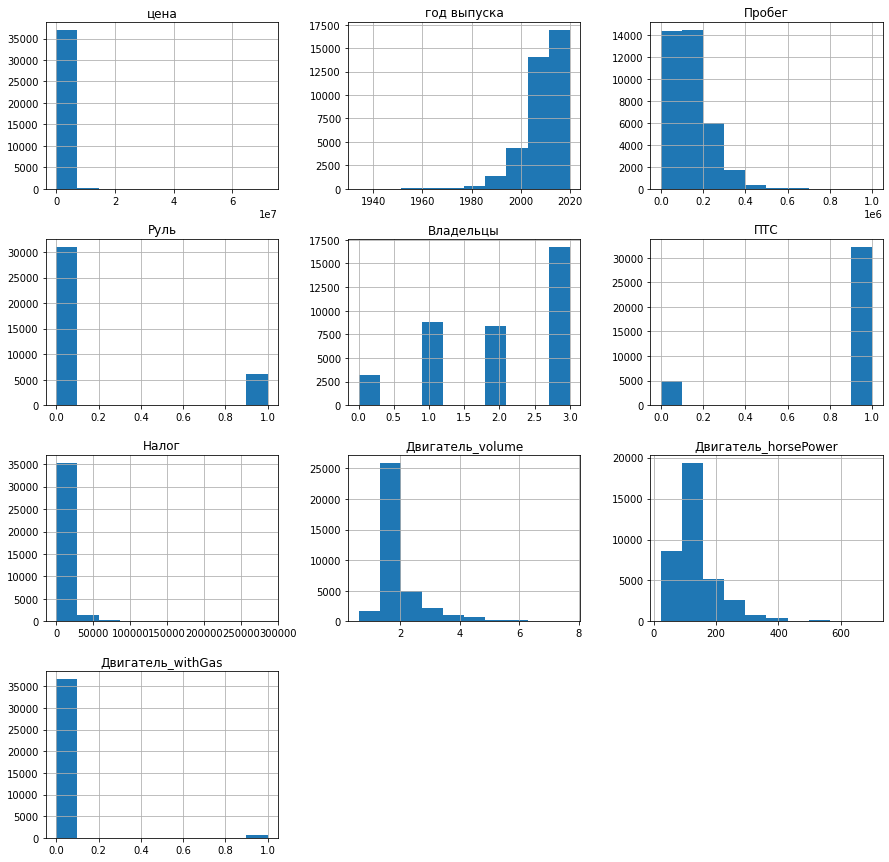

In [511]:
dataFrame.hist(figsize=(15, 15));

In [512]:
dataFrame.drop("Двигатель_withGas", axis="columns", inplace=True)

In [513]:
 dataFrame = pd.concat([dataFrame,  pd.get_dummies(dataFrame['Двигатель_fuelType'], prefix="Двигатель_fuelType"), 
                            pd.get_dummies(dataFrame['Комплектация'], prefix="Комплектация"), 
                            pd.get_dummies(dataFrame['Коробка'], prefix="Коробка"), 
                            pd.get_dummies(dataFrame['Кузов'], prefix="Кузов"),
                            pd.get_dummies(dataFrame['Цвет'], prefix="Цвет"),
                            pd.get_dummies(dataFrame['Привод'], prefix="Привод")],  axis=1)

In [514]:
dataFrame.drop(['Двигатель_fuelType', 'Комплектация', 'Коробка', 'Кузов', 'Цвет', 'Привод'], axis=1, inplace=True)

In [515]:
dataFrame.head()

,цена,год выпуска,Пробег,Руль,Владельцы,ПТС,Налог,Двигатель_volume,Двигатель_horsePower,Двигатель_fuelType_бензин,Двигатель_fuelType_газ,Двигатель_fuelType_гибрид,Двигатель_fuelType_дизель,Комплектация_#club,Комплектация_-,Комплектация_218i m sport pro,Комплектация_300 d 4matic sport,Комплектация_300 d 4matic sport plus,Комплектация_320d xdrive,Комплектация_320d xdrive m sport pro,Комплектация_320d xdrive m sport pure,Комплектация_320i sport line,Комплектация_320i xdrive m sport pure,Комплектация_35 tfsi s tronic,Комплектация_35 tfsi s tronic edition one,Комплектация_40 tdi s tronic,Комплектация_40 tfsi quattro s tronic,Комплектация_40 tfsi s tronic,Комплектация_400 d 4matic black line,Комплектация_400 d 4matic first class,Комплектация_400 d 4matic luxury,Комплектация_400 d 4matic sport,Комплектация_45 tdi quattro tiptronic,Комплектация_45 tfsi quattro s tronic,Комплектация_45 tfsi s tronic,Комплектация_450 4matic sport plus,Комплектация_530d xdrive m sport plus,Комплектация_530i xdrive m sport plus,Комплектация_730d xdrive m sport plus,Комплектация_740d xdrive m sport pro,Комплектация_750li xdrive m sport pro,Комплектация_a 200 sport,Комплектация_access,Комплектация_active,Комплектация_active (2017-2020),Комплектация_active (пакет 1),Комплектация_active + winter,Комплектация_active plus,Комплектация_advance 45 tfsi quattro s tronic,Комплектация_advance 45 tfsi s tronic,Комплектация_ambition,Комплектация_ambition (2020),Комплектация_ambition plus,Комплектация_amg g 63,Комплектация_amg gt 43 4matic+ особая серия,Комплектация_amg gt 53 4matic+ особая серия,Комплектация_amg gt 63 s 4matic+ особая серия,Комплектация_antarctic edition,Комплектация_aqua,Комплектация_autobiography,Комплектация_autobiography dynamic,Комплектация_base,Комплектация_basic,Комплектация_basis,Комплектация_black,Комплектация_black vision,Комплектация_black&brown,Комплектация_black&brown + winter,Комплектация_brown,Комплектация_business,Комплектация_business lounge,Комплектация_business vip,Комплектация_c 180 avantgarde edition,Комплектация_c 180 premium,Комплектация_c 180 sport,Комплектация_c 200 4matic sport,Комплектация_c 63 s 4matic особая серия,Комплектация_chequered flag,Комплектация_cla 200 sport,Комплектация_cla 250 4matic sport,Комплектация_classic,"Комплектация_classic ""теплые опции""",Комплектация_classic (5 мест air conditioner),Комплектация_classic (5 мест),Комплектация_classic (7 мест air conditioner),Комплектация_classic air conditioner,Комплектация_classic audio,Комплектация_classic optima,Комплектация_classic start,Комплектация_classic start plus,Комплектация_comfort,Комплектация_comfort (5 мест),Комплектация_comfort (7 мест),Комплектация_comfort + advanced,Комплектация_comfort + winter,Комплектация_comfort 2wd,Комплектация_comfort 4wd,Комплектация_comfort multimedia,Комплектация_comfort off-road plus,Комплектация_comfort winter,Комплектация_connect,Комплектация_connect (2019),Комплектация_cooper,Комплектация_cooper s all4,Комплектация_cosmo,Комплектация_cross country plus,Комплектация_deluxe,Комплектация_design 35 tfsi s tronic,Комплектация_design 40 tdi s tronic,Комплектация_design 40 tfsi quattro s tronic,Комплектация_design 40 tfsi s tronic,Комплектация_design 45 tdi,Комплектация_design 45 tfsi quattro s tronic,Комплектация_dream,Комплектация_dream i,Комплектация_dream ii,Комплектация_drive,Комплектация_drive plus,Комплектация_drive plus (2019),Комплектация_drive tce 150,Комплектация_dynamic,Комплектация_dynamic + панорамная крыша с люком,Комплектация_e 200 4matic intelligent drive,Комплектация_e 200 4matic sport,Комплектация_e 200 4matic sport plus,Комплектация_e 200 business,Комплектация_e 200 d business,Комплектация_e 200 sport,Комплектация_e 220 d 4matic premium,Комплектация_e 220 d 4matic sport,Комплектация_e 53 4matic+ особая серия,Комплектация_e 63 s 4matic+,Комплектация_edition one,Комплектация_edition plus,Комплектация_edition plus luxe,Комплектация_elegance,Комплектация_elegance + prestige + safety,Комплектация_elegance es,Ком

In [516]:
PrintAllUniqValue(dataFrame)

0 .  цена :  [1320000  575000 4350000 ... 1006300 2315200 2276500]
1 .  год выпуска :  [2017 2008 2019 2020 2010 2011 2013 2012 1995 2015 2016 2014 2006 2018
 2001 2009 2007 1997 2004 2005 2002 1987 2000 2003 1984 1999 1990 1996
 1998 1983 1992 1994 1981 1989 1980 1991 1993 1961 1965 1970 1969 1966
 1986 1960 1958 1955 1975 1971 1964 1973 1985 1988 1963 1977 1962 1978
 1968 1976 1979 1937 1982 1954 1972 1953 1959 1949 1974 1940 1934 1952
 1956 1967 1951 1939 1935 1947 1957 1950 1938]
2 .  Пробег :  [ 33380 218311     29 ... 256793 150040 163268]
3 .  Руль :  [0 1]
4 .  Владельцы :  [1 2 0 3]
5 .  ПТС :  [1 0]
6 .  Налог :  [ 6840  3000 40800 ... 28350  6420 23625]
7 .  Двигатель_volume :  [1.8 2.  3.8 3.6 2.5 6.4 1.6 3.  2.4 2.9 1.5 6.2 2.2 1.7 1.4 5.5 4.6 3.5
 1.3 1.2 4.2 1.  4.5 2.8 2.7 4.7 1.1 4.4 0.8 1.9 5.  3.7 4.8 4.  5.6 3.2
 3.3 2.1 5.7 0.7 3.1 4.1 2.6 6.8 2.3 5.4 6.  5.3 6.5 6.6 0.9 3.9 4.3 4.9
 5.2 6.3 3.4 7.7 5.9 0.6 5.8 6.1 7.  7.5]
8 .  Двигатель_horsePower :  [152 150 272

# **Готовимся**


---




In [517]:
y = dataFrame['цена']
x = dataFrame.drop("цена", axis=1)

In [518]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# **Обучаемся**


---




# *Линейная регрессия*


---




In [519]:
# Линейная регрессия

linearReg = LinearRegression().fit(x_train, y_train)

In [520]:
y_pred = linearReg.predict(x_test)

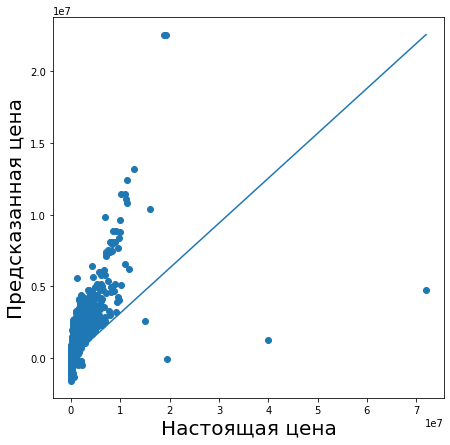

In [521]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(y_test)], [0, max(y_pred)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [522]:
sum = 0.0
max_deviation = 0
min_deviation = 10**10

for i, elem in enumerate(y_test):
  sum += fabs(y_pred[i]-elem)
  if fabs(y_pred[i]-elem) > max_deviation:
    max_deviation = fabs(y_pred[i]-elem)
  if fabs(y_pred[i] - elem) < min_deviation:
    min_deviation = fabs(y_pred[i]-elem)

print("Max_deviation ", max_deviation)
print("Min_deviation ", min_deviation)
print("Arithmetic_mean ", sum/len(y_pred))

Max_deviation  67278323.48249276
Min_deviation  0.15513679757714272
Arithmetic_mean  326413.4879390956


In [523]:
mean_absolute_error_linear = mean_absolute_error(y_test, y_pred)
mean_squared_error_linear = mean_squared_error(y_test, y_pred)
r2_score_linear = r2_score(y_test, y_pred) # Чем ближе R^2 к 1, тем лучше обобщающая способность модели.

In [524]:
print("mean_absolute_error: {0:7.2f}, \nmean_squared_error: {1:7.2f}, \nR^2: {2:7.2f}".format(
        mean_absolute_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred)**0.5, r2_score_linear))

mean_absolute_error: 326413.49, 
mean_squared_error: 1073185.01, 
R^2:    0.47


# *LightGBM*


---




In [525]:
d_train = lgb.Dataset (x_train, label = y_train)

In [526]:
params = {}
params ['learning_rate'] = 0.003
params ['boosting_type'] = 'gbdt'
params ['target'] = 'binary'
params ['metric'] = 'binary_logloss'
params ['sub_feature'] = 0.5
params ['num_leaves'] = 10
params ['min_data'] = 50
params ['max_depth'] = 10

In [527]:
lightGbm = lgb.train (params, d_train, 100)

In [528]:
y_pred = lightGbm.predict (x_test)
y_pred

array([748277.79388923, 844406.7160335 , 698730.59175419, ...,
       703149.50511525, 709215.71291905, 697729.80626323])

In [529]:
sum = 0.0
max_deviation = 0
min_deviation = 10**10

for i, elem in enumerate(y_test):
  sum += fabs(y_pred[i]-elem)
  if fabs(y_pred[i]-elem) > max_deviation:
    max_deviation = fabs(y_pred[i]-elem)
  if fabs(y_pred[i] - elem) < min_deviation:
    min_deviation = fabs(y_pred[i]-elem)

print("Max_deviation ", max_deviation)
print("Min_deviation ", min_deviation)
print("Arithmetic_mean ", sum/len(y_pred))

Max_deviation  69497901.39561714
Min_deviation  335.9593545838725
Arithmetic_mean  526274.438540952


In [530]:
mean_absolute_error_LightGBM = mean_absolute_error(y_test, y_pred)
mean_squared_error_LightGBM = mean_squared_error(y_test, y_pred)
r2_score_LightGBM = r2_score(y_test, y_pred) # Чем ближе R^2 к 1, тем лучше обобщающая способность модели.

In [531]:
print("mean_absolute_error: {0:7.2f}, \nmean_squared_error: {1:7.2f}, \nR^2: {2:7.2f}".format(
        mean_absolute_error(y_test, y_pred), 
        mean_squared_error(y_test, y_pred)**0.5, r2_score_LightGBM))

mean_absolute_error: 526274.44, 
mean_squared_error: 1308452.42, 
R^2:    0.21
